In [73]:
#"Hvor mange produkter kommer frem, når man søger på ""breaking benjamin""(se URL'en)
import webget
import pandas as pd
import requests
import bs4
url = 'https://www.merchbar.com/search?q=breaking%20benjamin'
r = requests.get(url)
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

select_breaking_benjamin = soup.find_all(class_= 'MerchTile.module__title')
select_breaking_benjamin
print('Number of Breaking Benjamins:{}'.format(len(select_breaking_benjamin)))



Number of Breaking Benjamins:20


In [103]:
#"Hvor mange TRACKs er der i det første produkt, som ligger i kategorien CDs?"
url_cd = 'https://www.merchbar.com/rock-alternative/breaking-benjamin/breaking-benjamin-saturated-cd'
r = requests.get(url_cd)
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

find_tracks = soup.select('span ol li', class_='track')
find_tracks
print('number of tracks on {}'.format(soup.find(class_='merch.module__merchTitle').text), 'is {}'.format(len(find_tracks)))


number of tracks on SATURATED CD is 13


41.17647058823529
58.82352941176471


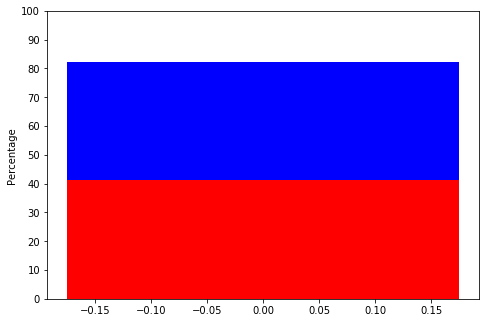

In [218]:
#"Vis et bar chart der viser: 
#- Procentdel af de viste produkter, der rent faktisk 
#   indeholder Breaking Benjamin merch
#- Procentdel af den merch, der er på tilbud
#- Procentdel af den merch, der ikke er på lager"

import matplotlib.pyplot as plot
import numpy as np
url = 'https://www.merchbar.com/search?q=breaking%20benjamin'
r = requests.get(url)
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

select_breaking_benjamin = soup.find_all(class_= 'MerchTile.module__title')
select_breaking_benjamin

nr_breaking_b = 34

actual_number = len(select_breaking_benjamin)
actual_number_in_percentage = actual_number/nr_breaking_b * 100
nr_breaking_b_in_percentage = 100-actual_number_in_percentage
print(nr_breaking_b_in_percentage)
print(actual_number_in_percentage)
ind = np.arange(1)
width = 0.35
fig = plot.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, actual_number_in_percentage, width, color='r')

ax.bar(ind, nr_breaking_b_in_percentage, width, color='b', bottom=nr_breaking_b_in_percentage)
ax.set_ylabel('Percentage')
ax.set_xticks(ind, 'Breaking B')
ax.set_yticks(np.arange(0, 101, 10))
plt.show()